In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas
import pynumdiff
import scipy.fftpack

In [2]:
def get_gamma(dt, freq):
    try:
        g = np.min([100, np.exp(np.log10(freq)*(-3)-1) ])
        
        
        if dt == 0.001:
            return g
        if dt == 0.01:
            return g / 2.5
        if dt == 0.1:
            return g / 5.
        
    except:
        g = [np.min([1000, np.exp(np.log10(f)*(-3)-1) ]) for f in freq]
        
        g = np.array(g)
        
        if dt == 0.001:
            return g
        if dt == 0.01:
            return g / 2.5
        if dt == 0.1:
            return g / 5.


In [25]:
def plot_power_spectra(x, t, cutoff_freq=None, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
    ax.set_yscale('log')
    ax.set_xscale('log')
        
    yf = scipy.fftpack.fft(x)
    N = len(t)
    dt = np.mean(np.diff(t))
    xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)
    
    P = 2.0/N * np.abs(yf[:N//2])
    ax.plot(xf, P, color='black', zorder=-10)
    
    if cutoff_freq is not None:
        ax.vlines(cutoff_freq, np.min(P), np.max(P), color='red')

In [56]:
def make_plot(method, method_parent, problem, dt, noise, timeseries_length, cutoff_freq, 
              ax_pos=None, ax_vel=None, ax_spectra=None, plot_truth=True):
    
    if ax_pos is None or ax_vel is None:
        fig = plt.figure()
        ax_pos = fig.add_subplot(131)
        ax_vel = fig.add_subplot(132)
        ax_spectra = fig.add_subplot(133)
        
    # simulate
    r = pynumdiff.utils.simulate.__dict__[problem](timeseries_length, noise_parameters=[0, noise], 
                                                   dt=dt)
    x, x_truth, dxdt_truth, _ = r
    t = np.linspace(0, timeseries_length, len(x))
    
    # optimize params
    tvgamma = get_gamma(dt, cutoff_freq)
    if method == 'jerk':
        if dt < 0.005:
            tvgamma = tvgamma * 100
    print('tvgamma: ', tvgamma)
    params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](x, dt, tvgamma=tvgamma)
    print('optimizer params: ', params)
    
    # estimate derivative
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](x, dt, params)
    
    # plot
    ax_vel.plot(t, xdot_smooth, color='red')
    if plot_truth:
        ax_vel.plot(t, dxdt_truth, '--', color='black')

    ax_pos.plot(t, x_smooth, color='red')
    if plot_truth:
        ax_pos.plot(t, x, '.', color='blue', zorder=-10)
        ax_pos.plot(t, x_truth, '--', color='black')
        
        
    plot_power_spectra(x, t, cutoff_freq, ax_spectra)
    

# individual example

In [53]:
dt = 0.01
noise = 0.1
timeseries_length = 4
cutoff_freq = 1
problem = 'pop_dyn'

method_parent = 'smooth_finite_difference'
method = 'butterdiff'

tvgamma:  0.14715177646857694


/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

optimizer params:  [2, 0.035533239841461124]


/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


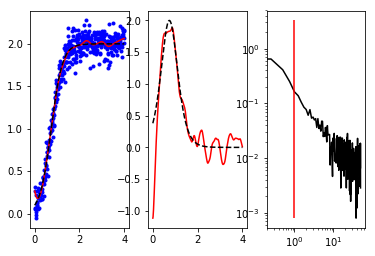

In [39]:
make_plot(method, method_parent, problem, dt, noise, timeseries_length, cutoff_freq, 
              ax_pos=None, ax_vel=None, plot_truth=True)

tvgamma:  7.38905609893065


/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

optimizer params:  [2, 0.00250976562499999]


/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


tvgamma:  738.905609893065
optimizer params:  [101215.0]


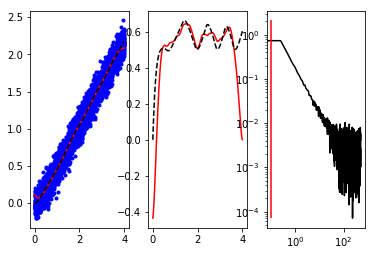

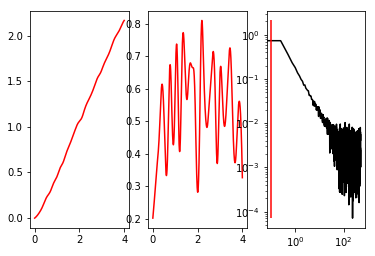

In [61]:
method_parents = ['smooth_finite_difference', 'total_variation_regularization']
methods = ['butterdiff', 'jerk']

dt = 0.001
noise = 0.1
timeseries_length = 4
cutoff_freq = 0.1
problem = 'pi_control'

for i in range(len(methods)):
    method = methods[i]
    method_parent = method_parents[i]
    if i == 0:
        plot_truth = 1
    else:
        plot_truth = 0
    make_plot(method, method_parent, problem, dt, noise, timeseries_length, cutoff_freq, 
              ax_pos=None, ax_vel=None, ax_spectra=None, plot_truth=plot_truth)

tvgamma:  1.197959006867258


/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

optimizer params:  [4, 0.017430961608886703]
tvgamma:  1.197959006867258


/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


optimizer params:  [1, 59, 68]
tvgamma:  1.197959006867258
optimizer params:  [11.40625, 9.953125]
tvgamma:  1.197959006867258
optimizer params:  [52429.75000000012]
tvgamma:  0.05964286697679858
optimizer params:  [2, 0.06877929687500006]
tvgamma:  0.05964286697679858
optimizer params:  [3, 31, 24]
tvgamma:  0.05964286697679858
optimizer params:  [0.0001678124999999998, 1.875]
tvgamma:  0.05964286697679858
optimizer params:  [192.5]
tvgamma:  1.197959006867258
optimizer params:  [2, 0.03609375000000013]
tvgamma:  1.197959006867258
optimizer params:  [1, 76, 48]
tvgamma:  1.197959006867258
optimizer params:  [0.04433593750000007, 0.1496191406249998]
tvgamma:  1.197959006867258
optimizer params:  [1383.3500000000026]
tvgamma:  0.14715177646857694
optimizer params:  [2, 0.06761718750000004]
tvgamma:  0.14715177646857694
optimizer params:  [3, 33, 22]
tvgamma:  0.14715177646857694
optimizer params:  [0.16781249999999975, 1875.0]
tvgamma:  0.14715177646857694
optimizer params:  [76.8950000

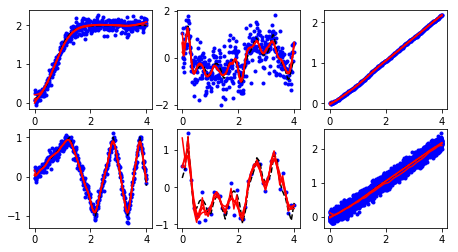

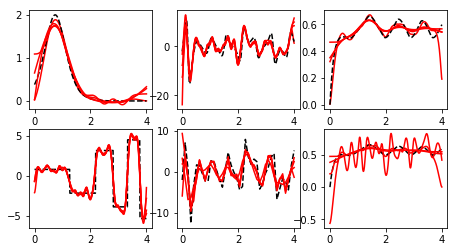

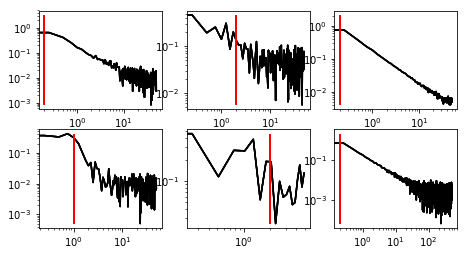

In [66]:
method_parents = ['smooth_finite_difference','linear_model', 'kalman_smooth', 'total_variation_regularization']
methods = ['butterdiff', 'savgoldiff', 'constant_acceleration', 'jerk']

fig_pos = plt.figure(figsize=(7.5, 4))
fig_vel = plt.figure(figsize=(7.5, 4))
fig_spectra = plt.figure(figsize=(7.5, 4))

for n in range(6):

    if n == 0:
        ax_pos = fig_pos.add_subplot(2,3,n+1)
        ax_vel = fig_vel.add_subplot(2,3,n+1)
        ax_spectra = fig_spectra.add_subplot(2,3,n+1)
        
        dt = 0.01
        noise = 0.1
        timeseries_length = 4
        cutoff_freq = .2
        problem = 'pop_dyn'

        for i in range(len(methods)):
            method = methods[i]
            method_parent = method_parents[i]
            if i == 0:
                plot_truth = 1
            else:
                plot_truth = 0
            make_plot(method, method_parent, problem, dt, noise, timeseries_length, cutoff_freq, 
                      ax_pos=ax_pos, ax_vel=ax_vel, ax_spectra=ax_spectra, plot_truth=plot_truth)
    
    if n == 1:
        ax_pos = fig_pos.add_subplot(2,3,n+1)
        ax_vel = fig_vel.add_subplot(2,3,n+1)
        ax_spectra = fig_spectra.add_subplot(2,3,n+1)
        
        dt = 0.01
        noise = 0.5
        timeseries_length = 4
        cutoff_freq = 2
        problem = 'lorenz_x'

        for i in range(len(methods)):
            method = methods[i]
            method_parent = method_parents[i]
            if i == 0:
                plot_truth = 1
            else:
                plot_truth = 0
            make_plot(method, method_parent, problem, dt, noise, timeseries_length, cutoff_freq, 
                      ax_pos=ax_pos, ax_vel=ax_vel, ax_spectra=ax_spectra, plot_truth=plot_truth)
            
    if n == 2:
        ax_pos = fig_pos.add_subplot(2,3,n+1)
        ax_vel = fig_vel.add_subplot(2,3,n+1)
        ax_spectra = fig_spectra.add_subplot(2,3,n+1)
        
        dt = 0.01
        noise = 0.01
        timeseries_length = 4
        cutoff_freq = .2
        problem = 'pi_control'

        for i in range(len(methods)):
            method = methods[i]
            method_parent = method_parents[i]
            if i == 0:
                plot_truth = 1
            else:
                plot_truth = 0
            make_plot(method, method_parent, problem, dt, noise, timeseries_length, cutoff_freq, 
                      ax_pos=ax_pos, ax_vel=ax_vel, ax_spectra=ax_spectra, plot_truth=plot_truth)
            
    if n == 3:
        ax_pos = fig_pos.add_subplot(2,3,n+1)
        ax_vel = fig_vel.add_subplot(2,3,n+1)
        ax_spectra = fig_spectra.add_subplot(2,3,n+1)
        
        dt = 0.01
        noise = 0.1
        timeseries_length = 4
        cutoff_freq = 1
        problem = 'triangle'

        for i in range(len(methods)):
            method = methods[i]
            method_parent = method_parents[i]
            if i == 0:
                plot_truth = 1
            else:
                plot_truth = 0
            make_plot(method, method_parent, problem, dt, noise, timeseries_length, cutoff_freq, 
                      ax_pos=ax_pos, ax_vel=ax_vel, ax_spectra=ax_spectra, plot_truth=plot_truth)
    
    
    if n == 4:
        ax_pos = fig_pos.add_subplot(2,3,n+1)
        ax_vel = fig_vel.add_subplot(2,3,n+1)
        ax_spectra = fig_spectra.add_subplot(2,3,n+1)
        
        dt = 0.1
        noise = 0.2
        timeseries_length = 4
        cutoff_freq = 2
        problem = 'lorenz_x'

        for i in range(len(methods)):
            method = methods[i]
            method_parent = method_parents[i]
            if i == 0:
                plot_truth = 1
            else:
                plot_truth = 0
            make_plot(method, method_parent, problem, dt, noise, timeseries_length, cutoff_freq, 
                      ax_pos=ax_pos, ax_vel=ax_vel, ax_spectra=ax_spectra, plot_truth=plot_truth)
            
    if n == 5:
        ax_pos = fig_pos.add_subplot(2,3,n+1)
        ax_vel = fig_vel.add_subplot(2,3,n+1)
        ax_spectra = fig_spectra.add_subplot(2,3,n+1)
        
        dt = 0.001
        noise = 0.1
        timeseries_length = 4
        cutoff_freq = .2
        problem = 'pi_control'

        for i in range(len(methods)):
            method = methods[i]
            method_parent = method_parents[i]
            if i == 0:
                plot_truth = 1
            else:
                plot_truth = 0
            make_plot(method, method_parent, problem, dt, noise, timeseries_length, cutoff_freq, 
                      ax_pos=ax_pos, ax_vel=ax_vel, ax_spectra=ax_spectra, plot_truth=plot_truth)
    
    
            
            
        
    fig_vel.savefig('problemset_velocity_' + method + '.pdf')
    fig_pos.savefig('problemset_position_' + method + '.pdf')
    fig_spectra.savefig('problemset_spectra_' + method + '.pdf')